This code is designed to make historical temperature plots for MPI, HAD, and Observational Data. 

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage
import xarray as xr
import pandas as pd

from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo

In [2]:
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

In [3]:
# Function used to create the map subplots
def plot_background(ax):
    ax.set_extent([235., 290., 20., 60.])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    return ax


In [4]:
# Open observation Precipitation
dir = '/chinook/dallmann/Ob_data/Ob_data/'
fn_ob = 'precip.V1.0.mon.mean.nc'

obs = xr.open_dataset(dir+fn_ob)

obs

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300, time: 846)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2018-06-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    history:        created 05/2012 by CAS from data obtained at NOAA NCEP/CPC
    description:    CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

In [6]:
#surface_temp = ds['tas']
#surface_temp

obs_surface_precip = obs['precip']

obs_sfc_pr_units = obs_surface_precip*31

# Arrange the data into DJF

obs_sfc_pr_DJF = obs_sfc_pr_units.where(obs_sfc_pr_units['time.season'] == 'DJF',drop = True)

nyears =  65

obs_sfc_pr_DJF= np.zeros((nyears))

counter = 0 
for jj in range (0,nyears,1): 
    obs_sfc_pr_DJF[jj] = obs_sfc_pr_DJF['precip'][counter:counter+3].mean()
    counter = counter + 3
    
obs_sfc_pr_DJF

In [7]:
#surface_temp.metpy.convert_units('degF')

time0 = '2016-01-01T00:00:00'

time1 = pd.date_range("2016-01-01", freq="6H", periods=365 * 4)
#obs = xr.Dataset({"foo": ("time", np.arange(365 * 4)), "time": time1})
#obs["time.month"]

lats = 0. 
latn = 90.

In [8]:
#sfc_temp = surface_temp.sel(time=time0,lat=slice(lats, latn))
#sfc_temp

sfc_precip_obs = obs_sfc_pr_units.sel(time=time0,lat=slice(lats, latn))

sfc_precip_obs

<xarray.DataArray 'precip' (lat: 120, lon: 300)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
    time     datetime64[ns] 2016-01-01

In [9]:
# Combine 1D latitude and longitudes into a 2D grid of locations
lon_2d, lat_2d = np.meshgrid(sfc_precip_obs['lon'], sfc_precip_obs['lat'])

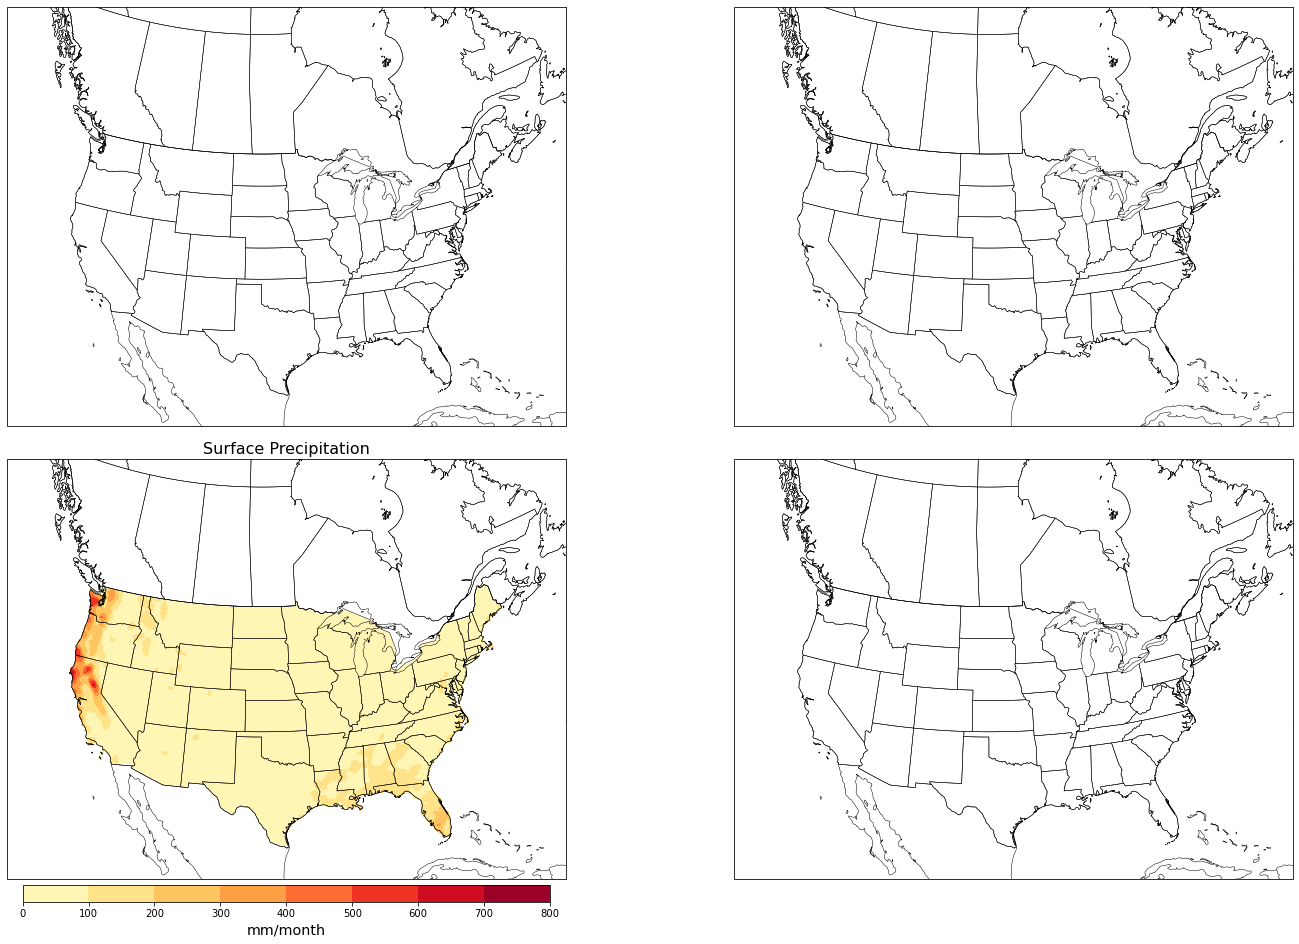

In [10]:
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(20, 13), constrained_layout=True,
                          subplot_kw={'projection': crs})
# add_metpy_logo(fig, 140, 120, size='large')
axlist = axarr.flatten()
for ax in axlist:
    plot_background(ax)
    
cf = axlist[2].contourf(lon_2d, lat_2d, sfc_precip_obs, cmap='YlOrRd',
                         transform=ccrs.PlateCarree(), zorder=0)
axlist[2].set_title('Surface Precipitation', fontsize=16)
cb = fig.colorbar(cf, ax=axlist[2], orientation='horizontal', shrink=0.74, pad=0)
cb.set_label('mm/month', size='x-large')